In [156]:
import numpy as np 
import matplotlib.pyplot as plt
import random 
import math
import pickle

# Functions

In [169]:
def dist(a, b):
    return math.sqrt((a[0]-b[0])**2 +(a[1]-b[1])**2 )


def Thor_step(x_T, y_T, x_s, y_s):
    global stop_game
    directions = []  # Possible directions
    #conditions to not leave the bounds
    if y_T[-1] != 0.5:
        directions += ["DOWN"]
    if y_T[-1] != n-0.5:
        directions += ["UP"]
    if x_T[-1] != 0.5:
        directions += ["LEFT"]
    if x_T[-1] != n-0.5:
        directions += ["RIGHT"]

    step = random.choice(directions)

    # Update the coordinates based on the chosen direction
    if step == "RIGHT":
        x = np.append(x_T, x_T[-1] + 1)
        y = np.append(y_T, y_T[-1])
    elif step == "LEFT":
        x = np.append(x_T, x_T[-1] - 1)
        y = np.append(y_T, y_T[-1])
    elif step == "UP":
        x = np.append(x_T, x_T[-1] )
        y = np.append(y_T, y_T[-1]+ 1)
    elif step == "DOWN":
        x = np.append(x_T, x_T[-1] )
        y = np.append(y_T, y_T[-1]- 1)
    
    return x, y


def Loki_step(x_L, y_L, x_s, y_s):
    global stop_game
    
    directions = []  # Possible directions
    #conditions to not leave the bounds
    if y_L[-1] != 0.5:
        directions += ["DOWN"]
    if y_L[-1] != n-0.5:
        directions += ["UP"]
    if x_L[-1] != 0.5:
        directions += ["LEFT"]
    if x_L[-1] != n-0.5:
        directions += ["RIGHT"]
    
    R_coords = {'UP':(x_L[-1],y_L[-1]+1), 'DOWN':(x_L[-1],y_L[-1]-1), 'LEFT':(x_L[-1]-1,y_L[-1]), 'RIGHT':(x_L[-1]+1,y_L[-1])}
    
    if (x_s, y_s) in R_coords.values():
        step = [i for i in R_coords if R_coords[i]==(x_s, y_s)]
    else: 
        Total_weights = 0
        for i in directions:
            Total_weights += 1/(dist((x_s, y_s), R_coords[i]))

        weightss = []
        for i in directions:
            weightss += [(1/dist((x_s, y_s), R_coords[i]))/Total_weights]

        step = random.choices(directions, weights=weightss, k=1)

    # Update the coordinates based on the chosen direction
    if step[0] == "RIGHT":
        x = np.append(x_L, x_L[-1] + 1)
        y = np.append(y_L, y_L[-1])
    elif step[0] == "LEFT":
        x = np.append(x_L, x_L[-1] - 1)
        y = np.append(y_L, y_L[-1])
    elif step[0] == "UP":
        x = np.append(x_L, x_L[-1] )
        y = np.append(y_L, y_L[-1]+ 1)
    elif step[0] == "DOWN":
        x = np.append(x_L, x_L[-1] )
        y = np.append(y_L, y_L[-1]- 1)

    return x, y


def run_game(x_L, y_L, x_T, y_T, x_s, y_s):
    global stop_game
    global curr_len
    
    while stop_game == False:
        if  (x_T[-1], y_T[-1]) == (x_s, y_s):
            stop_game = True
            game_outcome = 0
            break
        elif  (x_L[-1], y_L[-1]) == (x_s, y_s):
            stop_game = True
            game_outcome = 1
            break
        curr_len += 1
        
        (x_T, y_T) = Thor_step(x_T, y_T, x_s, y_s)
        (x_L, y_L) = Loki_step(x_L, y_L, x_s, y_s)
    return game_outcome
'''
    dot_size = int(500/n)
    
    fig = plt.figure(figsize = [10,10])
    ax = fig.add_subplot(1, 1, 1)

    grid_ticks = np.arange(0, n+1, 1)
    ax.set_xticks(grid_ticks)
    ax.set_yticks(grid_ticks)
    ax.grid(color = 'green', linestyle = '--', linewidth = 0.5,alpha=0.5)

    plt.plot([0,0,n,n,0], [0,n,n,0,0])
    plt.plot(x_s, y_s, marker="o", markersize=dot_size, markeredgecolor="red", markerfacecolor="red")
    plt.plot(x_T[0], y_T[0], marker="o", markersize=dot_size, markeredgecolor="blue", markerfacecolor="blue")
    plt.plot(x_L[0], y_L[0], marker="o", markersize=dot_size*0.8, markeredgecolor="black", markerfacecolor="black")
    plt.plot(x_T, y_T, color='b')
    plt.plot(x_L, y_L, color='k')
    plt.show()
'''
    


'\n    dot_size = int(500/n)\n    \n    fig = plt.figure(figsize = [10,10])\n    ax = fig.add_subplot(1, 1, 1)\n\n    grid_ticks = np.arange(0, n+1, 1)\n    ax.set_xticks(grid_ticks)\n    ax.set_yticks(grid_ticks)\n    ax.grid(color = \'green\', linestyle = \'--\', linewidth = 0.5,alpha=0.5)\n\n    plt.plot([0,0,n,n,0], [0,n,n,0,0])\n    plt.plot(x_s, y_s, marker="o", markersize=dot_size, markeredgecolor="red", markerfacecolor="red")\n    plt.plot(x_T[0], y_T[0], marker="o", markersize=dot_size, markeredgecolor="blue", markerfacecolor="blue")\n    plt.plot(x_L[0], y_L[0], marker="o", markersize=dot_size*0.8, markeredgecolor="black", markerfacecolor="black")\n    plt.plot(x_T, y_T, color=\'b\')\n    plt.plot(x_L, y_L, color=\'k\')\n    plt.show()\n'

# The game

In [158]:
n = 2 #define the size of the square

In [159]:
game_number = 0  #clear the game history
game_record = 0 
game_lengths = []

In [160]:
#starting position for the stone
x_s =  1.5 #n/2
y_s =  1.5 #n/2

In [207]:
#main code

for i_L in range(n):
        for j_L in range(n):
            for i_T in range(n):
                for j_T in range(n):
                    stop_game = False  

                    x_L = np.array([i_L+0.5])
                    y_L = np.array([j_L+0.5])
                    x_T = np.array([i_T+0.5])
                    y_T = np.array([j_T+0.5])

                    curr_len = 0
                    game_outcome = run_game(x_L, y_L, x_T, y_T, x_s, y_s )
                    game_record += game_outcome
                    game_lengths += [curr_len]
                    game_number += 1
                    

In [208]:
probability = (game_record / game_number)
average_game_len = sum(game_lengths) / len(game_lengths)

probability, average_game_len

(0.5296052631578947, 0.6891447368421053)

In [57]:
game_number

16

In [9]:
'''
with open("data_stochastics_octant.txt", "wb") as f: # "wb" because we want to write in binary mode
    pickle.dump((probability, average_game_len, game_lengths), f)
'''

'\nwith open("data_stochastics_octant.txt", "wb") as f: # "wb" because we want to write in binary mode\n    pickle.dump((probability, average_game_len, game_lengths), f)\n'

In [10]:
'''
with open("data_stochastics_octant.txt", "rb") as f: # "wb" because we want to write in binary mode
    data = pickle.load(f)
'''

'\nwith open("data_stochastics_octant.txt", "rb") as f: # "wb" because we want to write in binary mode\n    data = pickle.load(f)\n'

In [11]:
data = game_lengths

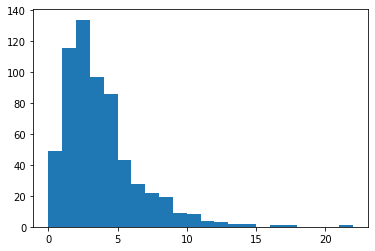

In [12]:
plt.hist(data, max(data))
plt.show() 

### Matrix maker


In [69]:
def coord_to_int(coord):
    global n #field size
    a= coord[0]
    b = coord[1]
    return (b-1)*n+a

In [75]:
MatrixL = np.array([[0.]*(n**2)]*(n**2))
MatrixT = np.array([[0.]*(n**2)]*(n**2))

In [76]:
s_x = 2 #math.ceil(n/2)
s_y = 2 #math.ceil(n/2)
for a in range(1, n+1):
    for b in range(1, n+1):
        directions = []  # Possible directions
        #conditions to not leave the bounds
        if b != 1:
            directions += ["DOWN"]
        if b != n:
            directions += ["UP"]
        if a != 1:
            directions += ["LEFT"]
        if a != n:
            directions += ["RIGHT"]
        
        R_coords = {'UP':(a,b+1), 'DOWN':(a,b-1), 'LEFT':(a-1,b), 'RIGHT':(a+1,b)}
    
        if (s_x, s_y) in R_coords.values():
            MatrixL[coord_to_int((a,b))-1][coord_to_int((s_x,s_y))-1]=1
        elif (s_x, s_y) == (a,b):
            pass
        else: 
            Total_weights = 0
            for i in directions:
                Total_weights += 1/(dist((s_x, s_y), R_coords[i]))
            for i in directions:
                MatrixL[coord_to_int((a,b))-1][coord_to_int(R_coords[i])-1]=((1/dist((s_x, s_y), R_coords[i]))/Total_weights)
MatrixL[coord_to_int((s_x,s_y))-1][coord_to_int((s_x,s_y))-1]=1

for a in range(1, n+1):
    for b in range(1, n+1):
        directions = []  # Possible directions
        #conditions to not leave the bounds
        if b != 1:
            directions += ["DOWN"]
        if b != n:
            directions += ["UP"]
        if a != 1:
            directions += ["LEFT"]
        if a != n:
            directions += ["RIGHT"]
        
        R_coords = {'UP':(a,b+1), 'DOWN':(a,b-1), 'LEFT':(a-1,b), 'RIGHT':(a+1,b)}
        if (s_x, s_y) == (a,b):
            pass
        else:
            for i in directions:
                MatrixT[coord_to_int((a,b))-1][coord_to_int(R_coords[i])-1]=1/len(directions)
MatrixT[coord_to_int((s_x,s_y))-1][coord_to_int((s_x,s_y))-1]=1




In [199]:
'''np.savetxt("Transition_matrixL_5x5.csv", MatrixL, delimiter=",")'''

In [77]:
MatrixL

array([[0. , 0.5, 0.5, 0. ],
       [0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 1. ]])

### First passage time calculations

In [16]:
#calculate fist pasage time

def first_pasage_time(start, end, n, Matrix):
    ''' 'start' is the starting state, 
    'end' is stone state, 
    'n' is number of steps and 
    'Matrix' is the transition matrix'''
    
    def loop_rec(n, seq):
        global All_paths
        '''n is time
        seq is a list of states to visit in backwards order, states start at 0'''
        if n>1:
            for i in np.nonzero(Matrix[seq[0]])[0]:
                loop_rec(n-1, [i]+seq)
        else:
            for i in np.nonzero(Matrix[seq[0]])[0]:
                All_paths += [[i]+seq]
    
    loop_rec(n, [start])  
    Good_paths = [All_paths[i] for i in range(len(All_paths)) if (All_paths[i][0]==end and All_paths[i][0]!=All_paths[i][1])]
    prod = 0
    for i in Good_paths:
        curr = 1
        for j in range(n):
            curr = curr*Matrix[i[n-j]][i[n-j-1]]
        prod += curr
    
    return prod

In [18]:
list_fpt_L = []
list_fpt_T = []
for i in range(16):
    All_paths=[]
    first_pasage_time(0, 12, 16, MatrixL)       


KeyboardInterrupt: 

In [353]:
All_paths

[[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 [2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 [6, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 5, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 [6, 5, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 [10, 5, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0],
 [2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0],
 [6, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0],
 [2, 3, 2, 1, 0, 1, 0, 1, 0, 1, 0],
 [4, 3, 2, 1, 0, 1, 0, 1, 0, 1, 0],
 [8, 3, 2, 1, 0, 1, 0, 1, 0, 1, 0],
 [12, 7, 2, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 6, 1, 0, 1, 0, 1, 0, 1, 0],
 [2, 1, 6, 1, 0, 1, 0, 1, 0, 1, 0],
 [6, 1, 6, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 5, 6, 1, 0, 1, 0, 1, 0, 1, 0],
 [6, 5, 6, 1, 0, 1, 0, 1, 0, 1, 0],
 [10, 5, 6, 1, 0, 1, 0, 1, 0, 1, 0],
 [12, 7, 6, 1, 0, 1, 0, 1, 0, 1, 0],
 [12, 11, 6, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 5, 0, 1, 0, 1, 0, 1, 0],
 [2, 1, 0, 5, 0, 1, 0, 1, 0, 1, 0],
 [6, 1, 0, 5, 0, 1, 0, 1, 0, 1, 0],
 [0, 5, 0, 5, 0, 1, 0, 1, 0, 1, 0],
 [6, 5, 0, 5, 0, 1, 0, 1, 0, 1, 0],
 [10, 5, 0, 5, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 6, 5, 0, 1, 0

In [25]:
All_paths=[]
first_pasage_time(0, 12, 16, MatrixT)       

0.04929238797527823